<a href="https://colab.research.google.com/github/olufam/Msc-Dissertation/blob/main/Safety_Detection_delete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>⭕ Safety Compliance in Work Environments: </br> ▶ &nbsp; An Image and Facial Detection System Using Machine Learning</b></h2>
<hr>
<h3><b>🦸 &nbsp; Author :</b> Olumide Famuyiwa
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
<b>🦸 &nbsp; Supervisor :</b> Olumide Famuyiwa</h3>
<hr>

## [Introduction](#intro)

## Table of Contents
1. [Installing Required Packages](#installing-required-packages)
2. [Importing Libraries](#importing-libraries)
3. [Performing Extra Setup](#performing-extra-setup)
4. [Dataset for Object Detection](#dataset-for-object-detection)
5. [Data Analysis for Object Detection](#data-analysis-for-object-detection)
6. [Training Object Detection Model (YOLOv8)](#training-object-detection-model)
7. [Evaluating Object Detection Model](#evaluating-object-detection-model)
8. [Testing Object Detection Model](#testing-object-detection-model)
9. [Dataset for Facial Recognition](#dataset-for-facial-recognition)
10. [Data Analysis for Facial Recognition](#data-analysis-for-facial-recognition)
11. [Training Facial Recognition Model (DeepFace)](#training-facial-recognition-model)
12. [Evaluating Facial Recognition Model](#evaluating-facial-recognition-model)
13. [Testing Facial Recognition Model](#testing-facial-recognition-model)
14. [Hybrid Implementation in Real Time](#hybrid-implementation-in-real-time)



# Introduction

In the following sections, we will delve into the Python code that powers our safety compliance system. The code is structured to cover all stages of our machine learning pipeline, from data preprocessing to model training and evaluation. Below are the key components:

## Key Components

1. **Data Analysis**: Initial steps to prepare the data for the machine learning models. This includes data splitting, noise reduction, and image normalization among other techniques.

2. **Model Training**: The core section where we implement and train our machine learning models—YOLOv8 for PPE detection and DeepFace for facial recognition.

3. **Evaluation**: Final steps to assess the models' performance against predefined metrics to gauge their effectiveness in a real-world setting.

By navigating through the code, readers will gain insights into the practical implementation of the machine learning algorithms discussed in the dissertation. Each section is modular, designed for ease of understanding and potential scalability.

---

In [1]:
# Configuration Setup for Dissertation Project

# PROJ_FLD_NAME: The name of the main project folder
PROJ_FLD_NAME = 'project'

# EXTERNAL_DATASET: The path to the external dataset ZIP file
EXTERNAL_DATASET = 'SALFORD/DISSERTATION/Safety_DS.zip'

# YOLO_MODEL_NAME: The name to be used for the YOLOv8 model
YOLO_MODEL_NAME = 'safety.yolov8.v1'

# NUMB_TRN_EPOCHS: The number of training epochs for model training
NUMB_TRN_EPOCHS = 20


## 1. Installing Required Packages
<a id='installing-required-packages'></a>
This section guides you through installing all the necessary Python packages required for this project, such as TensorFlow, OpenCV, and others.

---

In [2]:
# For Logs and Report Review: Suppressing the output of pip install in Google Colab
!pip install clearml > /dev/null 2>&1

# Setting up ClearML environment variables for API and web access
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=TKLDMLDT3FHO32BTVD4D
%env CLEARML_API_SECRET_KEY=0Dgl0sWMc6DLATOFAL4NSrQw3cVfTjUm61PvZH9rSfhBP1WmjD

# set the project Log Process Name
from clearml import Task
task = Task.init(project_name="dsKit_v6_project", task_name="dsKit_v6_name")

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=TKLDMLDT3FHO32BTVD4D
env: CLEARML_API_SECRET_KEY=0Dgl0sWMc6DLATOFAL4NSrQw3cVfTjUm61PvZH9rSfhBP1WmjD
ClearML Task: created new task id=736e22cbedcf4c5e9389a3fa79f10c72
2023-09-20 01:05:22,986 - clearml.Task - INFO - No repository found, storing script code instead


ClearML results page: https://app.clear.ml/projects/44269f74686f48c88f0ba35085fe4134/experiments/736e22cbedcf4c5e9389a3fa79f10c72/output/log


In [3]:
# Installing packages while suppressing the output
!pip install ultralytics > /dev/null 2>&1
!pip install wandb > /dev/null 2>&1


## 2. Importing Libraries
<a id='importing-libraries'></a>
Here, we import essential Python libraries like NumPy, Pandas, and machine learning libraries to set the foundation for the project.

---

In [4]:
# Importing essential packages and libraries for data manipulation,
# plotting, image processing, and model training
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2
import shutil
import wandb
import warnings
from google.colab import drive
import zipfile




## 3. Performing Extra Setup
<a id='performing-extra-setup'></a>
Here, we run the process to perform .

---

In [5]:
# Displaying the NVIDIA System Management Interface (SMI) to check GPU status
!nvidia-smi

Wed Sep 20 01:05:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
warnings.filterwarnings("ignore")
np.random.seed(12345)
%matplotlib inline


In [7]:
# Mount the Google Drive to access the dataset
drive.mount('/content/drive')

# Specify the path to the ZIP file located in Google Drive
zip_file_path = f'/content/drive/MyDrive/{EXTERNAL_DATASET}'

# Create the Working Directory
# Check if the working directory exists; if not, create it
WORKING_DIR = f'/content/{PROJ_FLD_NAME}'
if not os.path.exists(WORKING_DIR):
    os.makedirs(WORKING_DIR)  # Create directory
else:
    shutil.rmtree(WORKING_DIR)  # Remove existing directory and its contents
    os.makedirs(WORKING_DIR)  # Create a fresh directory

# Create the Dataset Directory
# Check if the dataset directory exists within the working directory; if not, create it
DATASET_DIR = os.path.join(WORKING_DIR, 'datasets')
if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)  # Create directory
else:
    shutil.rmtree(DATASET_DIR)  # Remove existing directory and its contents
    os.makedirs(DATASET_DIR)  # Create a fresh directory

# Unzip the Dataset
# Unzip the dataset ZIP file into the dataset directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(DATASET_DIR)

# Display the location where the dataset has been extracted
print("------------------------------------")
print(f"Data extracted to : {DATASET_DIR}")
print("------------------------------------")


Mounted at /content/drive
------------------------------------
Data extracted to : /content/project/datasets
------------------------------------


## 4. Dataset for Object Detection

The dataset is a curated collection of images tailored for safety compliance in work environments.

### Quick Summary

- **Safety Kits Detection Class**:
## Class Mapping for the Dataset

| Class Number | Class Name  |
|--------------|-------------|
| 0            | SafetyShoe  |
| 1            | faceMask    |
| 2            | goggle      |
| 3            | helmet      |
| 4            | person      |
| 5            | vest        |
| 6            | object      |


- **Number of Classes**: 11  
  {1 :'SafetyShoe', 2 :'faceMask', 3 :'goggle', 4 :'helmet', 5 :'no_faceMask', 6 :'no_gloves', 7 :'no_helmet', 8 :'no_vest', 9 :'object', 10:'person', 11:'vest'}
  
- **Label Annotation**: YOLOv8-coco(.txt files)



  ---


<a id="Data Exploration"></a>
<h2 style="padding: 12px 12px; background-color: #F5B041; font-family: Sans-Serif; color:black">
Data Exploration</h2>

In [8]:
# Define the path to the YAML file containing dataset information
DS_YAMLFILE = os.path.join(DATASET_DIR, 'data.yaml')

# Read the YAML file to extract dataset information
with open(DS_YAMLFILE, 'r') as file:
    data = yaml.safe_load(file)

# Get the total number of classes (nc) from the dataset and store it as 'num_classes'
num_classes = data.get('nc', None)

# Get the list of class names (names) from the dataset and store it as 'classes'
classes = data.get('names', None)

# Display the number of classes in the dataset
print(f"Total number of classes in the dataset (nc): {num_classes}")

# Display the list of class names in a human-readable format
print("Class names (names):")
for idx, class_name in enumerate(classes, 1):
    print(f"{idx}. {class_name}")


Total number of classes in the dataset (nc): 11
Class names (names):
1. SafetyShoe
2. faceMask
3. goggle
4. helmet
5. no_faceMask
6. no_gloves
7. no_helmet
8. no_vest
9. object
10. person
11. vest


In [9]:
# Define a dictionary containing information for the data.yaml file
dict_file = {
    'train': os.path.join(DATASET_DIR, 'train'),
    'val': os.path.join(DATASET_DIR, 'valid'),
    'test': os.path.join(DATASET_DIR, 'test'),
    'nc': num_classes,  # Number of classes
    'names': classes    # List of class names
}

# Re-create the YAML file in the current working directory
with open(os.path.join(WORKING_DIR, 'data.yaml'), 'w+') as file:
    # Write the dictionary to the YAML file
    yaml.dump(dict_file, file)

    # Print a message indicating the YAML file has been re-created
    print(f"Re-created the YAML FILE to WORKING_DIR \nDirectory: {WORKING_DIR}")


Re-created the YAML FILE to WORKING_DIR 
Directory: /content/project


In [10]:
# Define the path to the 'data.yaml' file
YAML_PATH = os.path.join(WORKING_DIR, 'data.yaml')

# Check if the 'data.yaml' file exists at the specified location
if os.path.exists(YAML_PATH):
    print(f"YAML file located at: {YAML_PATH}")
else:
    print(f"YAML file missing at location: {YAML_PATH}")
    print("Please verify the path to the YAML file.")


YAML file located at: /content/project/data.yaml


In [11]:
# Confirm the configuration of the YAML file if the path is correct
# YAML_PATH

# Read and display the content of the YAML file
with open(YAML_PATH, 'r') as file:
    # Load the YAML data
    data = yaml.safe_load(file)

    # Format the data for display, excluding sorting keys
    formatted_data = yaml.dump(data, default_flow_style=False, sort_keys=False)

    # Print the formatted content of data.yaml
    print("Displaying the content of data.yaml:")
    print(formatted_data)


Displaying the content of data.yaml:
names:
- SafetyShoe
- faceMask
- goggle
- helmet
- no_faceMask
- no_gloves
- no_helmet
- no_vest
- object
- person
- vest
nc: 11
test: /content/project/datasets/test
train: /content/project/datasets/train
val: /content/project/datasets/valid



In [12]:
# Confirm that the YAML folder paths are correctly configured
data_len = {}   # Dictionary to store data length for each mode
class_stat = {}  # Dictionary to store class statistics for each mode
class_idx = {}   # Dictionary to store class indices

val_Train = 'train'  # Training mode
val_Valid = 'valid'  # Validation mode
val_Test = 'test'    # Testing mode
modesArray = [val_Train, val_Valid, val_Test]  # List of modes

# Read and parse the YAML file
with open(YAML_PATH, 'r') as fileReader:
    yamlData = yaml.safe_load(fileReader)

# Get required data from the YAML file
num_classes = yamlData.get('nc', None)     # Number of classes
classes = yamlData.get('names', None)      # List of class names
yamlTrain = yamlData.get(val_Train, None)  # Training data information
yamlValid = yamlData.get(val_Valid, None)  # Validation data information
yamlTest = yamlData.get(val_Test, None)    # Testing data information
class_idx = {str(i): classes[i] for i in range(num_classes)}  # Map class indices to class names

# Loop through the modes (train, valid, test)
for mode in modesArray:
    # Initialize a dictionary to count the occurrences of each class
    class_count = {classes[i]: 0 for i in range(num_classes)}

    # Build the label_path for the current mode
    label_path = os.path.join(DATASET_DIR, mode, 'labels')

    # Check if the label_path exists
    if os.path.exists(label_path):
        print(f"OKAY: {mode} : {label_path}")
    else:
        print(f"ERROR: {mode} : Missing Path: {label_path}")
        break  # Stop the loop if the path is missing

    # Loop through each file in the label_path
    for file in os.listdir(label_path):
        with open(os.path.join(label_path, file)) as f:
            lines = f.readlines()

        # Count each class in the file
        for line in lines:
            cls = line.split()[0]
            class_count[class_idx[cls]] += 1

    # Store the data for the current mode
    data_len[mode] = len(os.listdir(label_path))
    class_stat[mode] = class_count


OKAY: train : /content/project/datasets/train/labels
OKAY: valid : /content/project/datasets/valid/labels
OKAY: test : /content/project/datasets/test/labels


In [13]:
#fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)
data_label = class_stat

print(data_label)

{'train': {'SafetyShoe': 1387, 'faceMask': 354, 'goggle': 1910, 'helmet': 7806, 'no_faceMask': 914, 'no_gloves': 2780, 'no_helmet': 3695, 'no_vest': 1616, 'object': 272, 'person': 1342, 'vest': 9520}, 'valid': {'SafetyShoe': 325, 'faceMask': 83, 'goggle': 468, 'helmet': 2361, 'no_faceMask': 234, 'no_gloves': 790, 'no_helmet': 954, 'no_vest': 473, 'object': 92, 'person': 376, 'vest': 2535}, 'test': {'SafetyShoe': 192, 'faceMask': 63, 'goggle': 286, 'helmet': 1151, 'no_faceMask': 98, 'no_gloves': 380, 'no_helmet': 569, 'no_vest': 273, 'object': 40, 'person': 182, 'vest': 1313}}


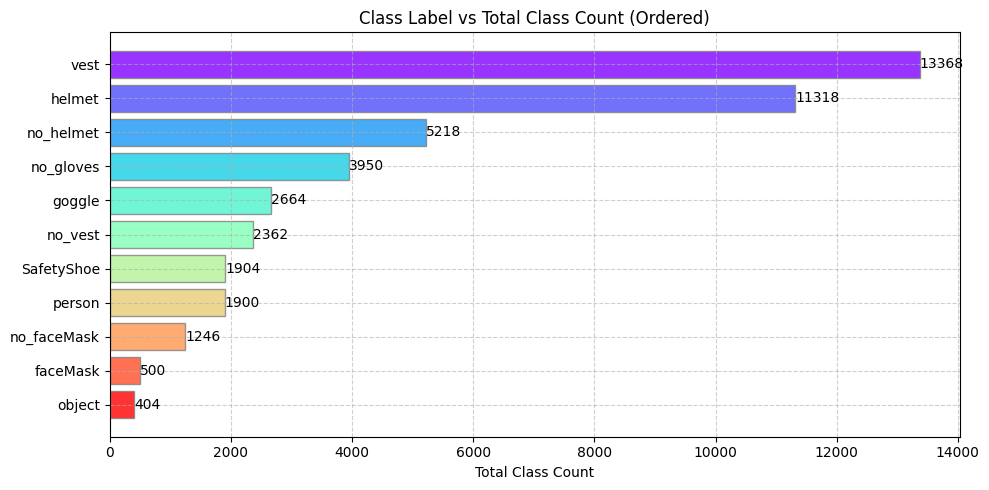

In [14]:
import matplotlib.pyplot as plt

# Combine counts from all modes and sort in ascending order
combined_counts = {class_label: sum(data_label[mode].get(class_label, 0) for mode in data_label) for class_label in data_label['train']}
sorted_counts = dict(sorted(combined_counts.items(), key=lambda item: item[1]))

# Get class labels and sorted counts
class_labels = list(sorted_counts.keys())
counts = list(sorted_counts.values())

# Create a horizontal bar chart with the "rainbow" colormap
fig, ax = plt.subplots(figsize=(10, 5))

# Set the y-axis labels as class labels
y_pos = range(len(class_labels))
bars = ax.barh(y_pos, counts, color=plt.cm.rainbow(np.linspace(1, 0, len(class_labels))), alpha=0.8, edgecolor='gray')

# Set the y-axis ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(class_labels)

# Set labels and title
ax.set_xlabel('Total Class Count')
ax.set_title('Class Label vs Total Class Count (Ordered)')

# Add horizontal and vertical grid lines
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate the bars with their values
for bar, count in zip(bars, counts):
    ax.annotate(str(count), xy=(count, bar.get_y() + bar.get_height() / 2), va='center', fontsize=10, color='black')

# Remove the outline of the entire chart (the figure)
fig.patch.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


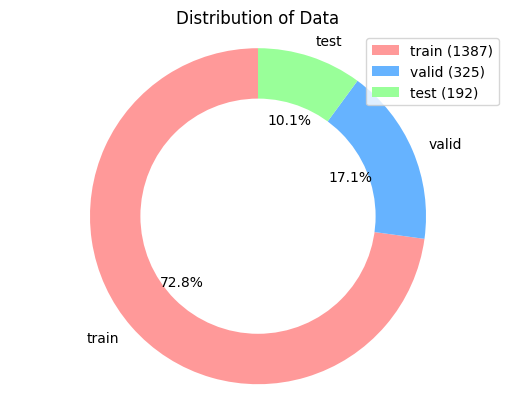

In [15]:
import matplotlib.pyplot as plt

# Sample data
data = {
    'train': 1387,
    'valid': 325,
    'test': 192
}

# Labels for the sections
labels = data.keys()

# Values for each section
sizes = data.values()

# Colors for each section
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Create a legend
legend_labels = [f'{label} ({size})' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc='upper right')

# Title
plt.title('Distribution of Data')

# Show the chart
plt.show()


In [16]:
for mode in modesArray:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(DATASET_DIR, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(480, 480)

Image sizes in valid set:

	(480, 480)

Image sizes in test set:

	(480, 480)


- All images have size `480x480`

<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Check dataset sizes</b></h4>

In [17]:
for mode in modesArray:

    files =  glob.glob(os.path.join(DATASET_DIR, mode, 'images', '*'))

    print(f'{mode} set size: {len(files)}\n')

train set size: 6734

valid set size: 1924

test set size: 962



- Load `pre-trained` YOLO-nano model

In [18]:
from ultralytics import settings
!wandb login

# Update a setting
#settings.update({'runs_dir': '/path/to/runs'})

# Update multiple settings
#settings.update({'runs_dir': '/path/to/runs', 'tensorboard': False})

# Reset settings to default values
#settings.reset()

# Print
formatted_settings = [f"- {key}: {value}" for key, value in settings.items()]
formatted_output = ',\n'.join(formatted_settings)
print(formatted_output)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
- settings_version: 0.0.4,
- datasets_dir: /content/datasets,
- weights_dir: weights,
- runs_dir: runs,
- uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb,
- sync: True,
- api_key: ,
- clearml: True,
- comet: True,
- dvc: True,
- hub: True,
- mlflow: True,
- neptune: True,
- raytune: True,
- tensorboard: True,
- wandb: True


In [19]:
# Modify and Update Setting
# Return a specific setting
#value = settings['runs_dir']
#print(value)
# Update datasets_dir
settings.update({'datasets_dir': DATASET_DIR})
# Update datasets_dir
settings.update({'runs_dir': f'{WORKING_DIR}/runs'})
# Update datasets_dir
settings.update({'weights_dir': f'{WORKING_DIR}/weights'})
# Print
formatted_settings = [f"- {key}: {value}" for key, value in settings.items()]
formatted_output = ',\n'.join(formatted_settings)
print(formatted_output)

- settings_version: 0.0.4,
- datasets_dir: /content/project/datasets,
- weights_dir: /content/project/weights,
- runs_dir: /content/project/runs,
- uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb,
- sync: True,
- api_key: ,
- clearml: True,
- comet: True,
- dvc: True,
- hub: True,
- mlflow: True,
- neptune: True,
- raytune: True,
- tensorboard: True,
- wandb: True


In [20]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 201MB/s]


2023-09-20 01:06:49,334 - clearml.model - INFO - Selected model id: db35f7b1c9b94286bd2bfd22730d6fd7


<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Train</b></h4>

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/project/data.yaml, epochs=20, patience=50, batch=32, imgsz=480, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=safety.yolov8.v1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a632a21c940>
fitness: 0.4978623010161283
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.25584,     0.39138,     0.28983,     0.59361,     0.55045,     0.48155,     0.51916,     0.38405,     0.55542,     0.69026,     0.47709])
names: {0: 'SafetyShoe', 1: 'faceMask', 2: 'goggle', 3: 'helmet', 4: 'no_faceMask', 5: 'no_gloves', 6: 'no_helmet', 7: 'no_vest', 8: 'object', 9: 'person', 10: 'vest'}
plot: True
results_dict: {'metrics/precision(B)': 0.7461846019036507, 'metrics/recall(B)': 0.6668001705035921, 'metrics/mAP50(B)': 0.7333721571669911, 'metrics/mAP50-95(B)': 0.47169453922158794, 'fitness': 0.4978623010161283}
save_dir: Path('/content/project/runs/detect/safety.yolov8.v1')


2023-09-20 01:19:53,090 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/dsKit_v6_project/dsKit_v6_name.736e22cbedcf4c5e9389a3fa79f10c72/models/best.pt


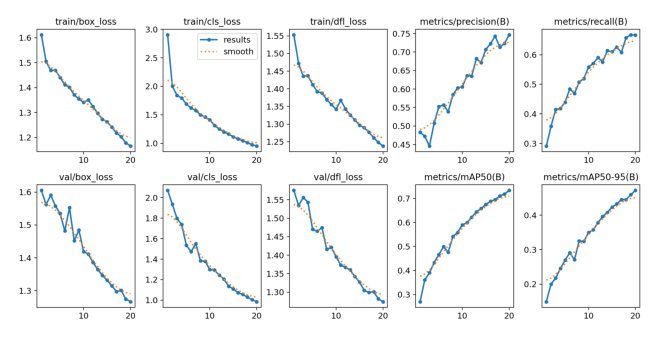

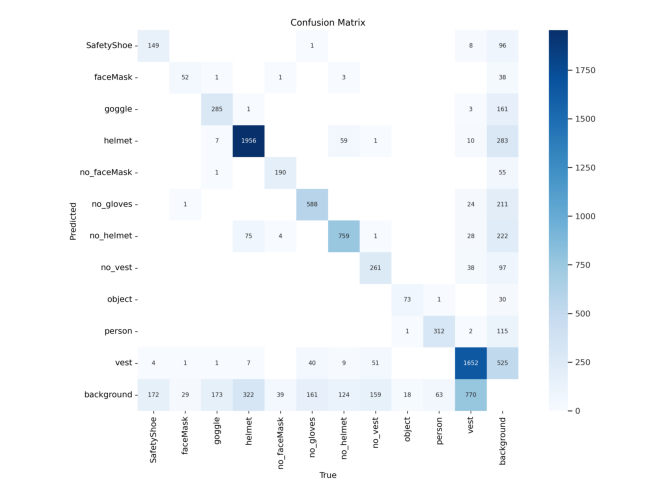

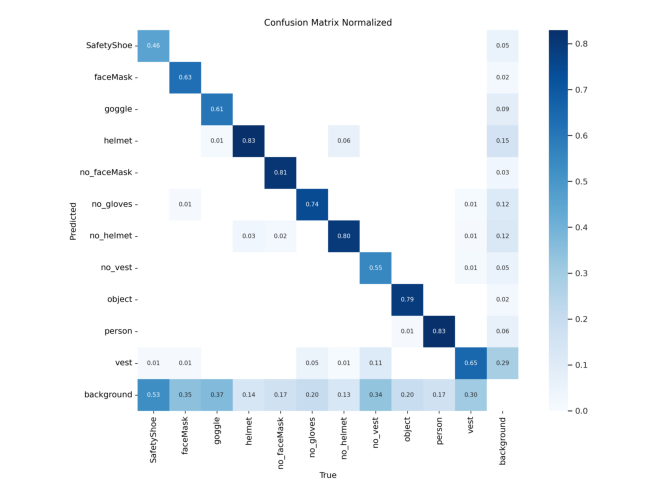

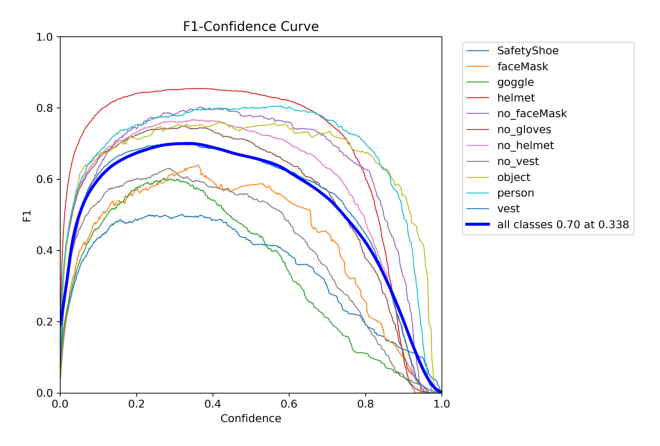

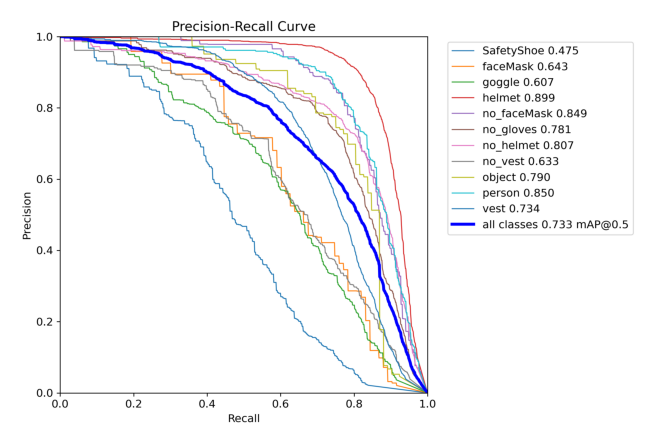

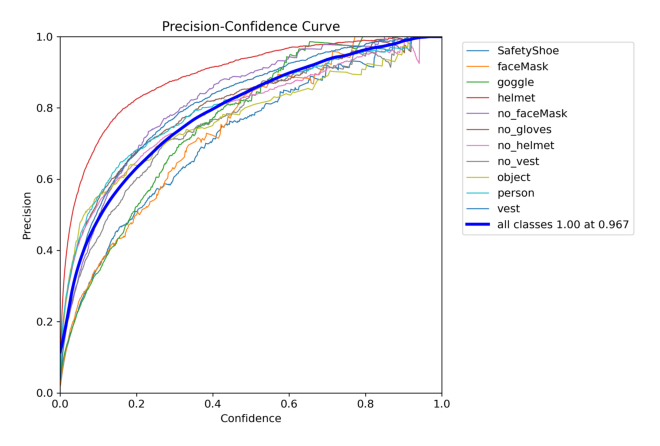

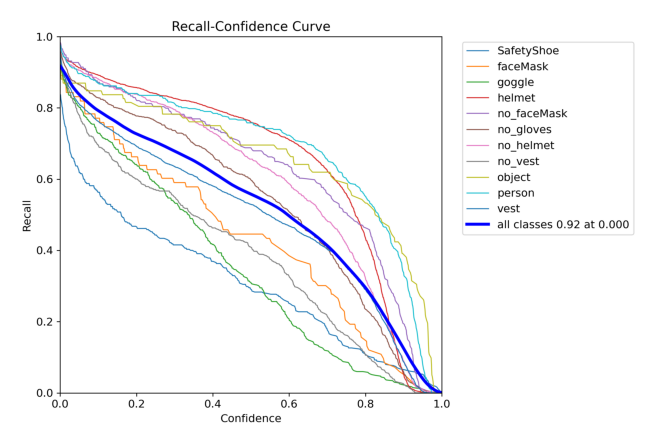

In [21]:
#model.train(data=YAML_PATH,
#            task='detect',
#            imgsz=480,
#            epochs=50,
#            batch=32,
#            mode='train',
#            plots=True,
#            resume=True,
#            save=True,
#            patience=50,
#            save_period=1,
#            name='yolov8n_v2_train')

model.train(data=YAML_PATH,
            task='detect',
            imgsz=480,
            epochs=NUMB_TRN_EPOCHS,
            save=True,
            patience=50,
            batch=32,
            save_period=1,
            mode='train',
            name=YOLO_MODEL_NAME)


In [22]:
#pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html


In [33]:
import zipfile
import os

def zipdir(path, ziph):
    # ziph is the zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                      os.path.join(path, '..')),
                       compress_type=zipfile.ZIP_DEFLATED)

# Specify the folder to zip
folder_path = '/content/project/runs'

# Specify the name of the zip file
zip_file_name = 'yolobkup.zip'

# Create a ZipFile object
zipf = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)

# Zip up the folder
zipdir(folder_path, zipf)

# Close the ZipFile object
zipf.close()


In [29]:
import os  # Import the os module
import shutil
import zipfile

folder_to_zip = '/content/project/runs'
zip_filename = '/content/sample_data/output.zip'

# Create a temporary copy of the folder
temp_folder = '/content/sample_data/temp'
shutil.copytree(folder_to_zip, temp_folder)

# Create a zip file from the temporary folder
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(temp_folder):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, temp_folder)
            zipf.write(file_path, arcname=arcname)

# Clean up the temporary folder
shutil.rmtree(temp_folder)


In [30]:
# Copy File to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp "/content/sample_data/output.zip" "/content/drive/My Drive/SALFORD/DISSERTATION/"

#EXTERNAL_DATASET = 'SALFORD/DISSERTATION/'

Mounted at /content/drive


NotImplementedError: ignored

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#import torch
#print(torch.cuda.is_available())


<a id="test"></a>

<h2 style="padding: 12px 12px; background-color: #F5B041; font-family: Sans-Serif; color:black">
Test</h2>

<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Select best model</b></h4>

In [24]:
model = YOLO('runs/detect/yolov8n_v1_train/weights/best.pt')

FileNotFoundError: ignored

<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Make predicitons on test set</b></h4>

In [ ]:
results = model.predict(source=os.path.join(INPUT_DIR, 'test', 'images'), save=True)

<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Show prediction results</b></h4>

In [ ]:
%matplotlib inline

predicitions = glob.glob(os.path.join(WORK_DIR, 'runs/detect/predict2', '*'))

n = 10

for i in range(n):
    idx = np.random.randint(0, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.imshow(image)
    plt.grid(False)
    plt.show()